<a href="https://colab.research.google.com/github/peterbmob/DHMVADoE/blob/main/Anove_OLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANOVA and OLS

An alternate, and more general way, to perform an ANOVA  is to use multivariable regresssion. This will be demonstrated below.

Consider again the following example:

Researchers took 20 cars of the same to take part in a study. These cars are randomly doped with one of the four-engine oils and allowed to run freely for 100 kilometers each. At the end of the journey, the performance of each of the cars is noted.

Hypothesis involved: A one-way ANOVA has the below given null and alternative hypotheses:

- H0 (null hypothesis): μ1 = μ2 = μ3 = … = μk (It implies that the means of all the population are equal)

- H1 (null hypothesis): It states that there will be at least one population mean that differs from the rest


# Step 1: load the data

In [1]:
import pandas as pd
# Performance when each of the engine
# oil is applied
p1 = [89, 89, 88, 78, 79]
p2 = [93, 92, 94, 89, 88]
p3 = [89, 88, 89, 93, 90]
p4 = [81, 78, 81, 92, 82]

df=pd.DataFrame({'oil_1':p1,'oil_2':p2,'oil_3':p3,'oil_4':p4})
df

,oil_1,oil_2,oil_3,oil_4
0,89,93,89,81
1,89,92,88,78
2,88,94,89,81
3,78,89,93,92
4,79,88,90,82


Manipulate the data so it can be used statmodels OLS function

In [3]:
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['oil_1', 'oil_2', 'oil_3', 'oil_4'])
# replace column names
df_melt.columns = ['index', 'Oil', 'value']
df_melt

,index,Oil,value
0,0,oil_1,89
1,1,oil_1,89
2,2,oil_1,88
3,3,oil_1,78
4,4,oil_1,79
5,0,oil_2,93
6,1,oil_2,92
7,2,oil_2,94
8,3,oil_2,89
9,4,oil_2,88


# Step 2: generate model and perform ANOVA analysis

In [41]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Ordinary Least Squares (OLS) model
model = ols('value ~ C(Oil)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table
# output (ANOVA F and p value)

,df,sum_sq,mean_sq,F,PR(>F)
C(Oil),3.0,244.2,81.4,4.625,0.016336
Residual,16.0,281.6,17.6,NaN,NaN


# Step 3: Interpret the results

Compare with the reults you obtained using scipy.stats.f_oneway. Is it he same?  

# Two-way ANOVA

Analysis of Variance and it is used to check whether there is a statistically significant difference between the mean value of three or more that has been divided into two factors. In simple words, ANOVA is a test conducted in statistics and it is used to interpret the difference between the mean value of at least three groups. The main objective of a two-way ANOVA is to find out how two factors affect a response variable and to find out whether there is a relation between the two factors on the response variable.

Performing a Two-Way ANOVA in Python: Let us consider an example in which scientists need to know whether plant growth is affected by fertilizers and watering frequency. They planted exactly 30 plants and allowed them to grow for six months under different conditions for fertilizers and watering frequency. After exactly six months, they recorded the heights of each plant centimeters.

# Let's load the data

In [42]:
import numpy as np
# Create a dataframe
df = pd.DataFrame({'Fertilizer': np.repeat(['daily', 'weekly'], 15),
                          'Watering': np.repeat(['daily', 'weekly'], 15),
                          'height': [14, 16, 15, 15, 16, 13, 12, 11, 14,
                                     15, 16, 16, 17, 18, 14, 13, 14, 14,
                                     14, 15, 16, 16, 17, 18, 14, 13, 14,
                                     14, 14, 15]})

df

,Fertilizer,Watering,height
0,daily,daily,14
1,daily,daily,16
2,daily,daily,15
3,daily,daily,15
4,daily,daily,16
5,daily,daily,13
6,daily,daily,12
7,daily,daily,11
8,daily,daily,14
9,daily,daily,15


# Step 2: Look at the data

<Axes: ylabel='Density'>

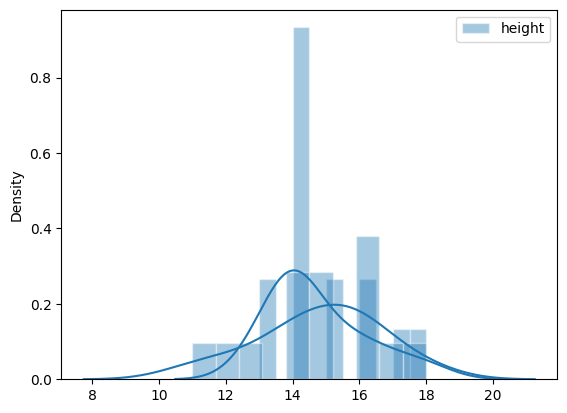

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df.loc[(df['Fertilizer']=='weekly')&(df['Watering']=='weekly')], bins=10, stat="density", kde=True, kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4,))
sns.histplot(df.loc[(df['Fertilizer']=='daily')&(df['Watering']=='daily')], bins=10, stat="density", kde=True,kde_kws=dict(cut=3),alpha=.4, edgecolor=(1, 1, 1, .4,))



# Step 2: train model and perform ANOVA

In [47]:
# Importing libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Performing two-way ANOVA
model = ols(
    'height ~ C(Fertilizer) + C(Watering) +\
    C(Fertilizer):C(Watering)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Fertilizer),4.390651e-13,1.0,1.589719e-13,1.000000
C(Watering),8.630952e-02,1.0,3.125000e-02,0.860956
C(Fertilizer):C(Watering),3.333333e-02,1.0,1.206897e-02,0.913305
Residual,7.733333e+01,28.0,NaN,NaN


# Step 3: Interpreting the result
The fertilizer p-value is equal to 1.000 The Watering p-value is equal to 0.8609 The Fertilizer * Watering: p-value is equal to 0.9133 The p-values for water and sun turn out to be less than 0.05 which implies that the means of both the factors possess a statistically significant effect on plant height. The p-value for the interaction effect (0.913305) is greater than 0.05 which depicts that there is no significant interaction effect between fertilizer frequency and watering frequency.